<a href="https://colab.research.google.com/github/mastermystery007/knn-LR-DT/blob/master/football_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np

data = pd.read_csv('football_data.csv')

first = data.fillna(0)


In [2]:
data = first.select_dtypes(include=[np.number])
data = data.drop(data.columns[0:2], axis=1)
data.astype(np.float64)
data

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,1307,1.0,2.0,2.0,22.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,1098,1.0,2.0,2.0,21.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,1189,1.0,3.0,2.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,1228,1.0,3.0,2.0,34.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [3]:
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0.517241,1.000000,0.978723,0.910836,1.0,0.8,0.8,0.101010,0.903226,1.000000,0.744681,0.967742,0.955556,1.000000,0.989362,1.000000,0.935484,1.000000,0.938144,0.895833,0.947917,0.989583,0.989583,0.894737,0.715789,0.750000,0.608247,1.000000,0.505263,0.239130,0.989474,1.000000,0.815217,1.000000,0.351064,0.301075,0.285714,0.066667,0.119565,0.164835,0.155556,0.085106
1,0.586207,1.000000,0.978723,0.926935,1.0,0.8,1.0,0.070707,0.903226,0.989474,0.946809,0.870968,0.966667,0.907216,0.861702,0.808511,0.827957,0.979167,0.917526,0.947917,0.906250,1.000000,0.729167,1.000000,1.000000,0.916667,0.814433,0.989362,0.663158,0.315217,1.000000,0.872340,0.923913,0.989583,0.297872,0.333333,0.252747,0.077778,0.119565,0.164835,0.155556,0.117021
2,0.344828,0.958333,0.957447,0.874303,1.0,1.0,1.0,0.101010,0.849462,0.915789,0.659574,0.903226,0.933333,0.989691,0.936170,0.925532,0.838710,0.989583,0.969072,0.937500,1.000000,0.979167,0.875000,0.842105,0.642105,0.843750,0.505155,0.872340,0.589474,0.391304,0.936842,0.925532,0.880435,0.979167,0.287234,0.258065,0.362637,0.100000,0.097826,0.164835,0.166667,0.117021
3,0.379310,0.937500,0.957447,0.458204,0.8,0.6,0.2,0.010101,0.182796,0.136842,0.223404,0.537634,0.144444,0.185567,0.223404,0.202128,0.548387,0.437500,0.587629,0.604167,0.625000,0.937500,0.447917,0.326316,0.705263,0.447917,0.659794,0.127660,0.400000,0.326087,0.126316,0.723404,0.434783,0.708333,0.159574,0.225806,0.142857,1.000000,0.923913,0.956044,0.977778,1.000000
4,0.379310,0.937500,0.936170,0.959752,0.8,1.0,0.8,0.070707,1.000000,0.863158,0.585106,0.989247,0.911111,0.886598,0.904255,0.882979,0.978495,0.947917,0.804124,0.791667,0.822917,0.947917,0.802083,0.957895,0.663158,0.937500,0.773196,0.968085,0.800000,0.663043,0.915789,1.000000,0.858696,0.916667,0.723404,0.623656,0.560440,0.166667,0.141304,0.054945,0.111111,0.138298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,0.103448,0.020833,0.361702,0.356656,0.2,0.4,0.4,0.222222,0.365591,0.400000,0.425532,0.526882,0.277778,0.432990,0.319149,0.361702,0.483871,0.447917,0.556701,0.593750,0.625000,0.510417,0.791667,0.452632,0.578947,0.416667,0.484536,0.404255,0.484211,0.500000,0.410526,0.553191,0.467391,0.468750,0.425532,0.516129,0.516484,0.111111,0.141304,0.076923,0.088889,0.095745
18203,0.103448,0.020833,0.319149,0.227245,0.2,0.4,0.4,0.212121,0.247312,0.547368,0.553191,0.462366,0.400000,0.402062,0.340426,0.212766,0.268817,0.416667,0.422680,0.406250,0.395833,0.416667,0.541667,0.431579,0.494737,0.447917,0.690722,0.446809,0.494737,0.173913,0.484211,0.351064,0.467391,0.437500,0.234043,0.161290,0.208791,0.111111,0.097826,0.098901,0.055556,0.127660
18204,0.000000,0.020833,0.404255,0.283591,0.2,0.6,0.4,0.333333,0.268817,0.421053,0.489362,0.408602,0.422222,0.463918,0.404255,0.287234,0.301075,0.458333,0.721649,0.718750,0.520833,0.489583,0.604167,0.473684,0.631579,0.572917,0.329897,0.478723,0.336842,0.163043,0.505263,0.457447,0.597826,0.427083,0.340426,0.139785,0.120879,0.066667,0.054348,0.109890,0.066667,0.138298
18205,0.034483,0.020833,0.382979,0.307740,0.2,0.6,0.4,0.343434,0.473118,0.526316,0.414894,0.451613,0.444444,0.525773,0.361702,0.340426,0.344086,0.541667,0.628866,0.625000,0.541667,0.218750,0.739583,0.673684,0.442105,0.416667,0.494845,0.361702,0.347368,0.239130,0.463158,0.500000,0.543478,0.479167,0.212766,0.268817,0.296703,0.155556,0.065217,0.153846,0.088889,0.095745


0,1,2,3,4,5,6,7,closest centroids  are  [2 2 2 0 2 2 2 2 2 0 2 2 1 2 2 2 2 2 0 0 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 0 0 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 1 2 2 2 0 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 2 2 2] 


distace is  0.5776445857218135
0,1,2,3,4,5,6,7,closest centroids  are  [1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 0 1 1 2 2 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 2 0 1 2 2 1 0 3 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 0 1 1 3 1 1 1 2 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1] 


distace is  0.4733656495368829
0,1,2,3,4,5,6,7,closest centroids  are  [4 4 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 3 4 4 3 3 4 2 1 4 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1
 4 4 4 1 4 4 4 3 4 4 4 4 4 4 1 4 4 4 3 4 4 4 4 4 4 4] 


distace is  0.4608267252697275
0,1,2,3,4,5,6,7,closest centroids  are  [1 1 1 0 1 1 3 1 3 0 1 3 3 1 3 1 1 1 0 0 3 1 0 1 3 1 1 3 1 1 1 1 1 1 3 3 1
 0 1 3 0 0 3 1 2 3 0 1 1 3 1 3 3 3 3 1 1 0 1 3 1 1 

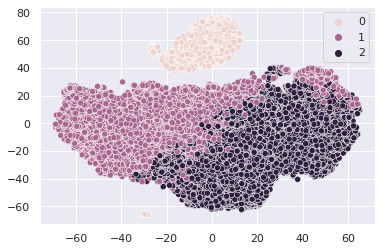

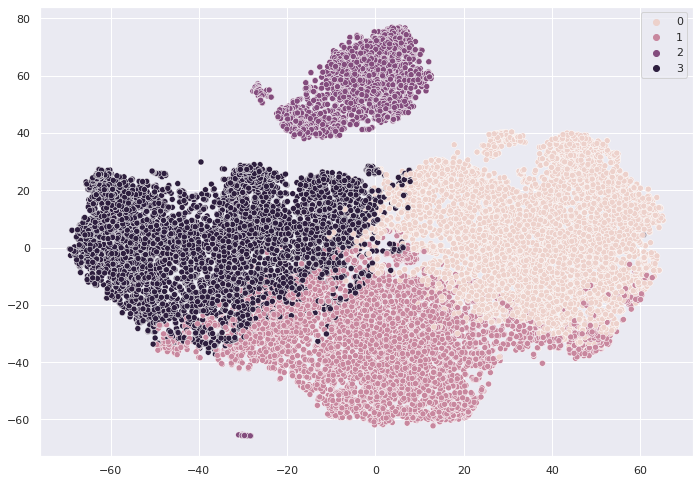

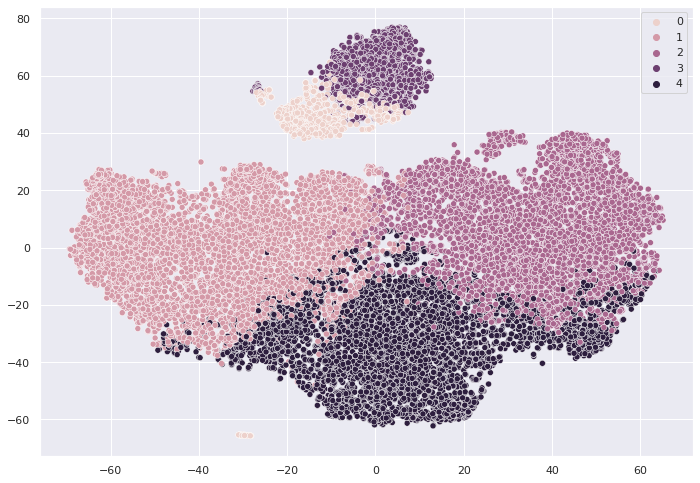

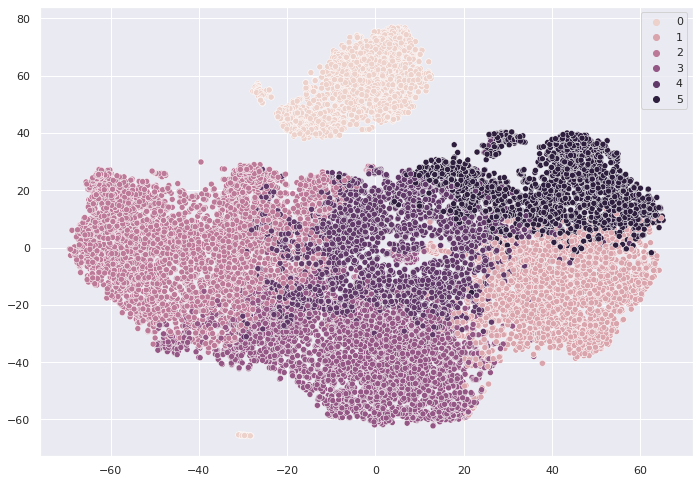

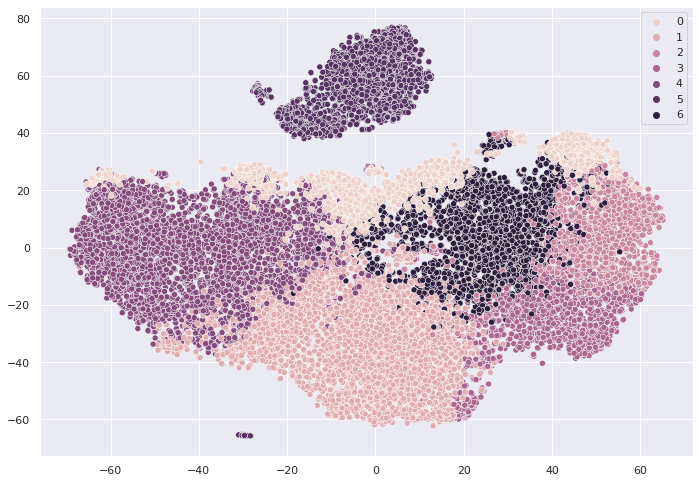

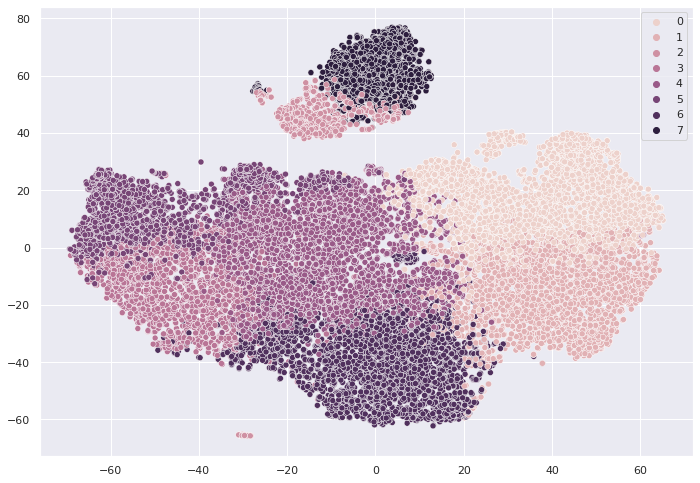

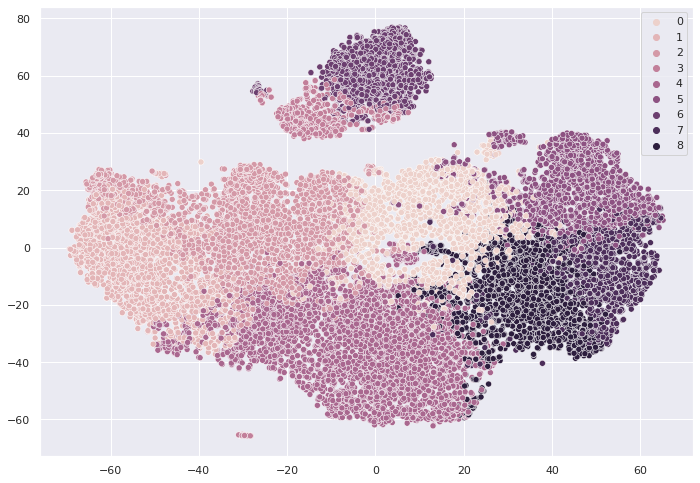

In [4]:
#implement Kmeans from scratch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score
import matplotlib.pyplot as plt
      

class Kmeans:

    def __init__(self):
      pass

    def get_new_centroids(self,X,centres,k):
        mean = []
        for count in range(k):
            #Xp = X[centres == count].mean(axis = 0) # check this 
            mean.append(X[centres == count].mean(axis=0))
        return np.concatenate([val[ None, :] for val in mean], axis = 0)


    def random_partition(self,X, k):
        indices = np.random.choice(range(0, k), replace = True, size = X.shape[0])
        mean = []
        for count in range(k):
            Xtemp = X[indices == count]
            mean.append(Xtemp.mean(axis=0))
        
        ret  = np.concatenate([val[ None, :] for val in mean], axis = 0)
        return  ret



    def forgy_initialize(self,X, k):
      choices = np.random.choice(range(X.shape[0]), replace = False,size = k)
      ret = X[choices, :]
      return ret

    def compute_distances_no_loops(self,X1, X2):
        dists = -2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1) + np.sum(X1**2, axis=1)[:,np.newaxis]
        return dists

    def get_cost(self,distance_m,centroids):
      distance = 0 
      for i in range (0,len(distance_m)):
        distance = distance + distance_m[i][centroids[i]]
      ret = distance/len(distance_m)
      print("distace is ",ret)
      return ret


    #implement elbow method from scratch
    def elbow(self,cost_list):
      x_list = [3,4,5,6,7,8,9]
      plt.plot(cost_list)
      plt.show()
      



#####   LOAD DATA HERE  ######



from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns


X_train = df
X_train = np.array(X_train,dtype = np.float64)


iters = 8
k_clusters = 10

cost_list = []
correct_cnt_list = []

tsne = TSNE()
X_embedded = tsne.fit_transform(X_train)


km = Kmeans()
for k in range(3,k_clusters):
  count = 0
  
  centroids1 = km.forgy_initialize(X_train,k_clusters)
  
  for i in range (iters):
    distances = km.compute_distances_no_loops(X_train,centroids1)
    print(count,end = ",")
    count = count+1
    centres = np.argmin(distances, axis=1)
    centroids1 = km.get_new_centroids(X_train,centres,k) 

  # print("final centroids are :",centroids1,"\n\n")
  #min_dist_labels gives us which all distances between centroids and data points
  min_dist_labels = km.compute_distances_no_loops(X_train,centroids1)
  # print("final distance matrix is  ",min_dist_labels,"\n\n")
  
  
  #closest points gives us which centroid the point is closest to
  closest_points = np.argmin(distances, axis=1)
  print("closest centroids  are ",closest_points[:100],"\n\n")



  #cost_list stores the inter cluster distance . We pass distance matrix and the corresponding centroid.
  #Then we add each data points distance from its centroid and return average distance value.
  cost_list.append(km.get_cost(min_dist_labels,closest_points))

  cluster_index= [[] for i in range(k_clusters)]

  for ind in range(len(X_train)):
    cluster_index[closest_points[ind]].append(first.iloc[ind])



  #palette = sns.color_palette("bright", 4)
  
  
  import matplotlib.pyplot as plt

  plt.figure(k)
  sns.set(rc={'figure.figsize':(11.7,8.27)})
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=closest_points, legend='full')

  # mappings = {}
  # for i in range(k):
  #   a = np.bincount(ci[i]).argmax()
  #   final_labels.append(a)
  #   mappings[i] = a
  #   # print(a)


  # min_dist_labels = km.compute_distances_no_loops(X_test,centroids1)
  # my_centroid = np.argmin(min_dist_labels, axis=1)
  # #print(my_centroid.shape)
  # num = my_centroid.shape[0]
  # correct_cnt = 0 


  # for i in range(0,len(my_centroid)):
  #   if(Y_test[i] == mappings[my_centroid[i]]):
  #     correct_cnt = correct_cnt+1

  # correct_cnt_list.append(correct_cnt/num)
  # print("the accuracy is ",correct_cnt/num)  

  # print("homogenity score is",homogeneity_score(my_centroid,Y_test))

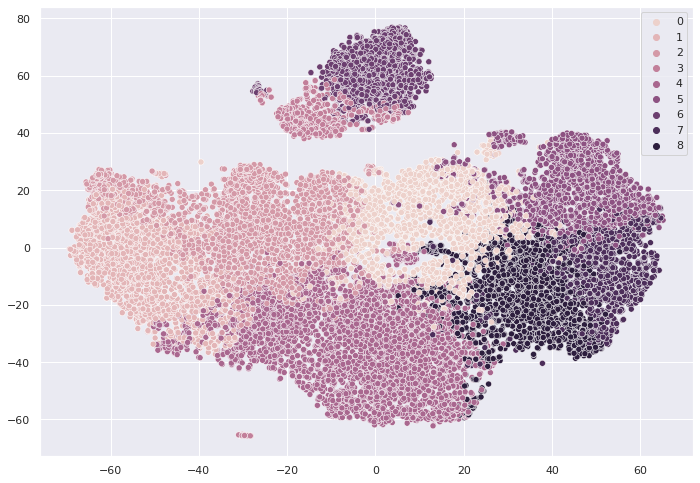

In [5]:
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=closest_points, legend='full')

Since we see an elbow at k = 6-7 , we use this as the optimum k value.

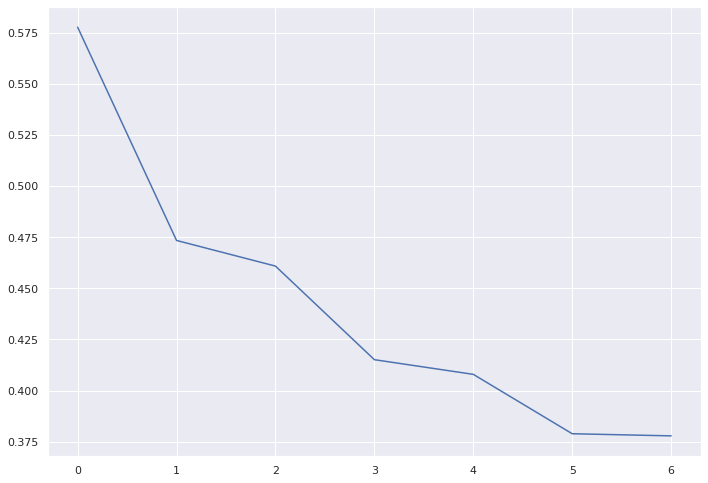

In [6]:
import matplotlib.pyplot as plt
km.elbow(cost_list) #

All the Goal Keepers have come in a single cluster

In [11]:
PK = pd.DataFrame(cluster_index[6])
PK

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",0,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€68M,€94K,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 16, 2014",0,2021,6'2,192lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€58M,€240K,1328,Right,3.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2014",0,2022,6'2,187lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",0,2024,6'6,212lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,€38M,€130K,1473,Right,5.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 1, 2011",0,2021,6'4,203lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17164,17164,237201,K. McIntosh,24,https://cdn.sofifa.org/players/4/19/237201.png,United States,https://cdn.sofifa.org/flags/95.png,55,62,Portland Timbers,https://cdn.sofifa.org/teams/2/light/111140.png,€90K,€1K,1135,Right,1.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,43.0,"Jan 12, 2017",0,2018,6'0,174lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21.0,16.0,13.0,26.0,19.0,16.0,21.0,19.0,35.0,18.0,41.0,41.0,39.0,49.0,50.0,34.0,66.0,44.0,57.0,17.0,41.0,30.0,15.0,53.0,32.0,58.0,10.0,16.0,15.0,

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_train)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.2609270974524236)
For n_clusters = 4, silhouette score is 0.26218312730341803)
For n_clusters = 5, silhouette score is 0.23612693023020725)
For n_clusters = 6, silhouette score is 0.20436725193570884)
For n_clusters = 7, silhouette score is 0.19664235972352148)
For n_clusters = 8, silhouette score is 0.18682014026611293)
For n_clusters = 9, silhouette score is 0.19034277810802328)
